In [3]:
# arranging wheat grains on a 4 square plate

import numpy as np
import matplotlib.pyplot as plt

small_board_ndarray = np.arange(4) #To create a numpy array containing 0 - 3 to represent a board

small_board_ndarray = 2 ** small_board_ndarray#To double the wheat added to each cell 

small_board_ndarray = small_board_ndarray.reshape((2, 2)).copy()#reshape dimension to 2 by 2 array

print("Arrange wheat on a plate of 4 squares (ndarray)：\n{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：
[[1 2]
 [4 8]]


In [5]:
# A function that returns a ndarray containing the number of wheat on an nxm chess board

def expand(a, b):
    ndarry = np.arange(a*b, dtype=np.uint64)

    ndarry = 2 ** ndarry
    return ndarry.reshape((a, b)).copy()


chessboard = expand(8, 8)

print(chessboard)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

Total number of wheat on a chess board of 8 x 8 squares: 18,446,744,073,709,551,615


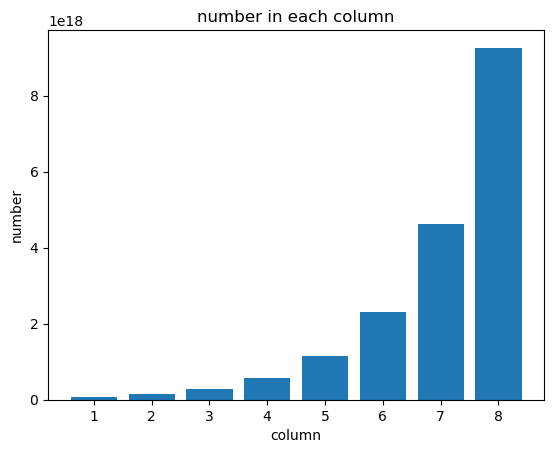

In [6]:
# Total number of wheat on a chess board of 8 x 8 squares

total_wheat = expand(8, 8).sum()
print(f"Total number of wheat on a chess board of 8 x 8 squares: {total_wheat :,}")


chessboard = expand(8, 8)
column = np.arange(1, 9)
number = np.hsplit(chessboard, 8)

for x in range(len(number)):
    number[x] = number[x].sum()

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(column, number)
plt.show()

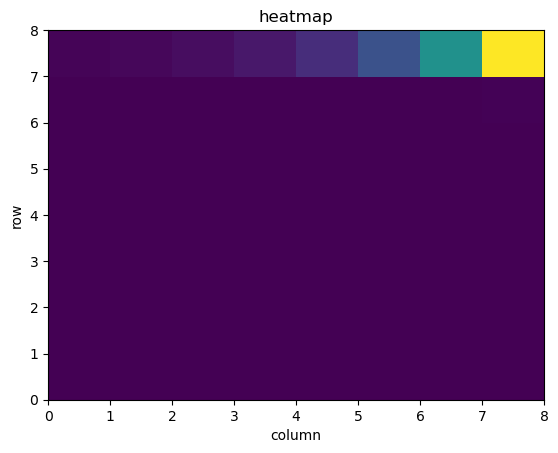

In [7]:
# To Visualize the number of wheat on the 8x8 chess board as a heat map.

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard)
plt.show()

In [8]:
#To find how many times the second half isgreater than the first half

 

nd_board = chessboard.flatten() #flatten the chess board

# the size of the chessboard is 64(squares).Hence ,convergence in the mid point 
first_half = nd_board[:32]
second_half = nd_board[32:]
ratio = second_half.sum()/ first_half.sum()

print(f"The second half of the chessboard is {ratio :,} times greater than the first half of the chessboard")

The second half of the chessboard is 4,294,967,296.0 times greater than the first half of the chessboard


In [9]:
 # Expansion to n × m mass by another calculation method

def broadcast(n):
  small_board_ndarray = np.array([1], dtype=np.uint64)
  for _ in range(n -1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
  return small_board_ndarray.copy()


chess_b = broadcast(64).reshape((8, 8))
chess_b

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.

In [17]:
#Comparing calculation times

%%timeit

x = expand(8, 8)

18.8 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
%%timeit

y = broadcast(64)

1.12 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%%timeit
def doSome(n):
  arry = [1]
  for _ in range(n -1 ):
    arry.append(2 * arry[-1])

  return arry.copy()

z = doSome(64)

18.7 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
